In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Auto.csv"
df = pd.read_csv(url)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<ipython-input-7-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


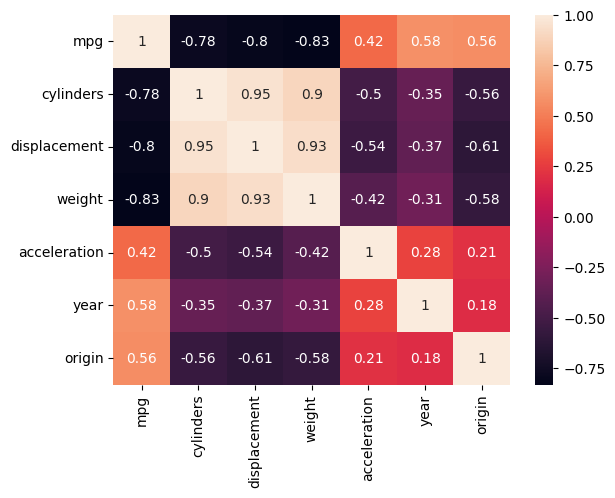

In [7]:
sns.heatmap(df.corr(), annot=True);

We can see with the heatmap above that **cylinders**, **displacement**, and **weight** are the closest 3 variables correlated with **mpg**. Intrestingly they are all negatively correlated.

# 1. Building a Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df[['cylinders', 'displacement', 'weight']]
y = df['mpg']

multi_reg = LinearRegression()
multi_reg.fit(X, y)

y_pred = multi_reg.predict(X)

print('Coefficients:', multi_reg.coef_)
print('MSE:', mean_squared_error(y, y_pred) )
print('R-sq:', r2_score(y, y_pred) )

Coefficients: [-0.25212832 -0.0128126  -0.00575098]
MSE: 18.431288570101632
R-sq: 0.6982876453941691


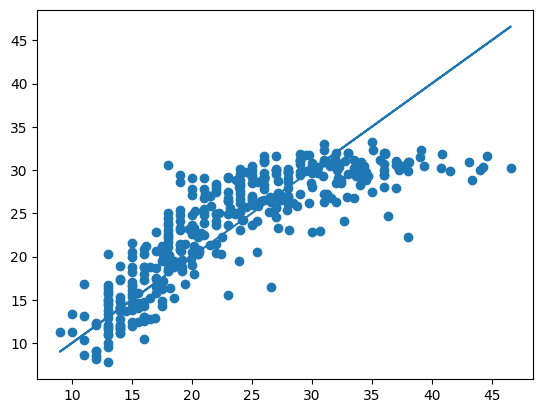

In [12]:
plt.scatter(y, y_pred)
plt.plot(y, y)

# 2. Building a Ridge Regression Model

In [17]:
X = df[['weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('Coefficients:', ridge.coef_)
print('MSE:', mean_squared_error(y_test, y_pred) )
print('R-sq:', r2_score(y_test, y_pred) )

Coefficients: [-0.00781978]
MSE: 23.44342843003026
R-sq: 0.6179954078563625


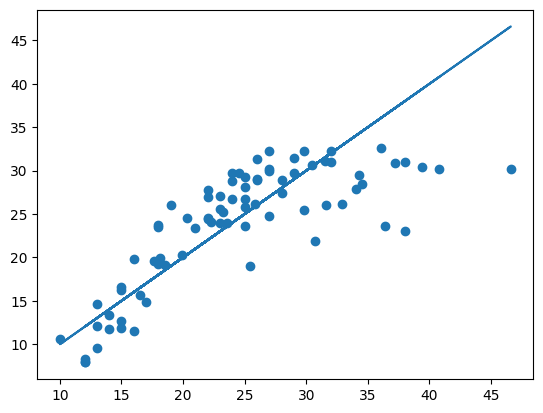

In [18]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)

# 3. Building a Neural Network Model


In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

In [65]:
df = df.replace('?',np.nan)
df = df.dropna()
X = df.drop(["mpg", "name"], axis=1).astype('float32')
y = df["mpg"].astype('float32')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
392,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
393,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
394,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
395,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [66]:
# Neural network
model = Sequential()
model.add(Dense(12, input_dim=7, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [68]:
# train the model (set verbose to True to see the output)
model.fit(X_train, y_train, validation_split=0.2, epochs=400, verbose=True)

In [69]:
#predications
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [70]:


print('MSE:', mean_squared_error(y_test, y_pred) )

print('R-sq:', r2_score(y_test, y_pred) )

MSE: 19.773146
R-sq: 0.6170985182951891


## 4. Comparing models
1. R2 - Multi-linear: 0.6982876453941691
2. R2 - Ridge: 0.6179954078563625
3. R2 - Deep Learning: 0.6170985182951891

# Conclusion
It's surprising that the Neural Network didn't do as well as the other models, even though it ran for 400 epochs. The model finished training pretty quickly, in under a minute. I think it could have done better if we had a larger training dataset and more time to let it learn.

On the other hand, the Multilinear Regression model worked the best out of all the models we tried. It seems like a good choice when you're working with smaller datasets. Plus, it's really straightforward to use and efficient.